#### Задание 1

Импортируйте библиотеки pandas и numpy.
Загрузите "Boston House Prices dataset" из встроенных наборов данных библиотеки sklearn. Создайте датафреймы X и y из этих данных.
Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test) с помощью функции train_test_split так, чтобы размер тестовой выборки
составлял 30% от всех данных, при этом аргумент random_state должен быть равен 42.
Создайте модель линейной регрессии под названием lr с помощью класса LinearRegression из модуля sklearn.linear_model.
Обучите модель на тренировочных данных (используйте все признаки) и сделайте предсказание на тестовых.
Вычислите R2 полученных предказаний с помощью r2_score из модуля sklearn.metrics.


In [1]:
import warnings

warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

from sklearn.datasets import load_boston

In [2]:
boston = load_boston()
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [3]:
data = boston["data"]
data.shape

(506, 13)

In [4]:
feature_names = boston["feature_names"]

feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [5]:
target = boston["target"]

target[:10]

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9])

In [6]:
X = pd.DataFrame(data, columns=feature_names)

X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [7]:
y = pd.DataFrame(target, columns=["price"])

y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   price   506 non-null    float64
dtypes: float64(1)
memory usage: 4.1 KB


In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [10]:
from sklearn.linear_model import LinearRegression

In [11]:
lr = LinearRegression()

In [12]:
lr.fit(X_train, y_train)

LinearRegression()

In [13]:
y_pred = lr.predict(X_test)
y_pred.shape

(152, 1)

In [14]:
check_test = pd.DataFrame({
    "y_test": y_test["price"],
    "y_pred": y_pred.flatten(),
})

check_test.head(10)

,y_test,y_pred
173,23.6,28.648960
274,32.4,36.495014
491,13.6,15.411193
72,22.8,25.403213
452,16.1,18.855280
76,20.0,23.146689
316,17.8,17.392124
140,14.0,14.078599
471,19.6,23.036927
500,16.8,20.599433


In [15]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.7112260057484973


#### Задание 2

Создайте модель под названием model с помощью RandomForestRegressor из модуля sklearn.ensemble.
Сделайте агрумент n_estimators равным 1000,
max_depth должен быть равен 12 и random_state сделайте равным 42.
Обучите модель на тренировочных данных аналогично тому, как вы обучали модель LinearRegression,
но при этом в метод fit вместо датафрейма y_train поставьте y_train.values[:, 0],
чтобы получить из датафрейма одномерный массив Numpy,
так как для класса RandomForestRegressor в данном методе для аргумента y предпочтительно применение массивов вместо датафрейма.
Сделайте предсказание на тестовых данных и посчитайте R2. Сравните с результатом из предыдущего задания.
Напишите в комментариях к коду, какая модель в данном случае работает лучше.


In [16]:
from sklearn.ensemble import RandomForestRegressor

In [17]:
from sklearn.metrics import roc_auc_score

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [19]:
model = RandomForestRegressor(max_depth=12, random_state=42, n_estimators=100, oob_score=True)


In [20]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [21]:
check_test = pd.DataFrame({
    "y_test": y_test["price"],
    "y_pred": y_pred.flatten(),
})

check_test.head(10)

,y_test,y_pred
205,22.6,21.327466
72,22.8,22.628024
244,17.6,18.417798
298,22.5,24.914420
427,10.9,16.187600
156,13.1,17.252513
200,32.9,33.984667
10,15.0,22.573667
313,21.6,22.941194
139,17.8,15.109248


In [22]:
r2_score(y_test, y_pred)

0.8698230655078615

Модель Случайного леса(RandomForestRegressor) работает лучше, чем модель обученная на случайной регрессии.


#### *Задание 3

Вызовите документацию для класса RandomForestRegressor,
найдите информацию об атрибуте feature_importances_.
С помощью этого атрибута найдите сумму всех показателей важности,
установите, какие два признака показывают наибольшую важность.


#### !Одной из важных процедур предобработки данных в алгоритмах их анализа является отбор значимых признаков. Его цель заключается в том, чтобы отобрать наиболее существенные признаки для решения рассматриваемой задачи классификации.

Отбор признаков необходим для следующих целей:

Для лучшего понимания задачи. Человеку легче разобраться с небольшим количеством признаков, чем с огромным их количеством.
Для ускорения алгоритмов.
Для улучшения качества предсказания. Устранение шумовых признаков может уменьшить ошибку алгоритма на тестовой выборке, т.е. улучшить качество предсказания.
Отбор значимых признаков осуществляется как «вручную» — на основе анализа содержательной постановки задачи, так и «автоматически» — с помощью универсальных алгоритмов.

Отбор признаков «вручную» (как и «ручной» синтез новых признаков) — важный этап в анализе данных. К сожалению, нам не известны содержательные значения используемых в рассматриваемой задаче признаков, поэтому ограничимся только их автоматическим отбором. Для этого существует много различных алгоритмов. Рассмотрим только один из них – с помощью случайного леса.

Все, что нужно сделать, – это после вызова метода predict для случайного леса прочитать поле feature_importances_. Для каждого признака это поле содержит число, выражающее «важность» этого признака. Чем больше число, тем значимее признак. Сумма всех чисел равна 1.

Упорядочим значимости и выведем их значения:

In [23]:
from sklearn.inspection import permutation_importance
from matplotlib import pyplot as plt

%matplotlib inline

plt.rcParams.update({'figure.figsize': (10.0, 6.0)})
plt.rcParams.update({'font.size': 12})

In [24]:
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]
print(importances)
np.sum(importances)

[0.04915583 0.00151753 0.00472755 0.000452   0.02148988 0.3806646
 0.02000304 0.04225663 0.00745733 0.0152504  0.02176889 0.01172436
 0.42353196]


1.0

In [25]:
model.feature_importances_

array([0.04915583, 0.00151753, 0.00472755, 0.000452  , 0.02148988,
       0.3806646 , 0.02000304, 0.04225663, 0.00745733, 0.0152504 ,
       0.02176889, 0.01172436, 0.42353196])

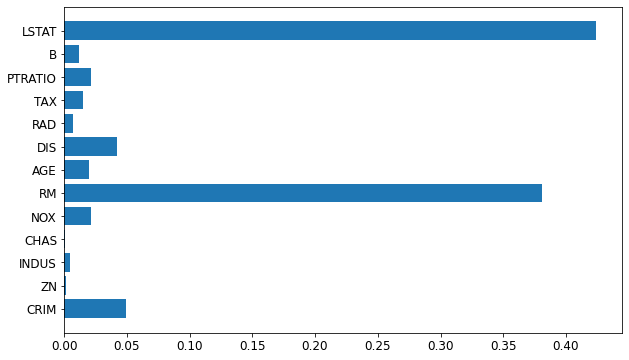

In [26]:
plt.barh(boston.feature_names, model.feature_importances_)
plt.show()